## Redes Neurais Artificiais 2025.1

- **Disciplina**: Redes Neurais Artificiais 2025.1  
- **Professora**: Elloá B. Guedes (ebgcosta@uea.edu.br)  
- **Github**: http://github.com/elloa  
        

Levando em conta a base de dados **_Forest Cover Type_**, esta segunda parte do Projeto Prático 2.2 diz respeito à proposição e avaliação de múltiplas redes neurais artificiais do tipo feedforward multilayer perceptron para o problema da classificação multi-classe da cobertura florestal em uma área do Roosevelt National Forest.

## Testando Redes Neurais sem os Atributos Categórios

1. Abra a base de dados em questão
2. Elimine todas as colunas relativas aos atributos categóricos
3. Armazene o atributo alvo em uma variável y e os atributos preditores em uma variável X
4. Efetue uma partição holdout 70/30 com o sklearn, distribuindo os exemplos de maneira aleatória
5. Efetue o escalonamento dos atributos

### Escalonando os atributos

O treinamento de uma rede neural artificial é mais eficiente quando os valores que lhes são fornecidos como entrada são pequenos, pois isto favorece a convergência. Isto é feito escalonando-se todos os atributos para o intervalo [0,1], mas precisa ser feito de maneira cautelosa, para que informações do conjunto de teste não sejam fornecidas no treinamento.

Há duas estratégias para tal escalonamento: normalização e padronização. Ambas possuem características particulares, vantagens e limitações, como é possível ver aqui: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/


No nosso caso, vamos usar a padronização. Assim, com os atributos preditores do treinamento, isto é, X_train, deve-se subtrair a média e dividir pelo desvio padrão:

X_train_std = (X_train - np.mean(X_train))/np.std(X_train)

Em seguida, o mesmo deve ser feito com os atributos preditores do conjunto de testes, mas com padronização relativa ao conjunto de treinamento:

X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

Se todo o conjunto X for utilizado na padronização, a rede neural receberá informações do conjunto de teste por meio da média e variância utilizada para preparar os dados de treinamento, o que não é desejável.

In [28]:
## Reservado para a importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, ConfusionMatrixDisplay, confusion_matrix
import joblib
from joblib import Parallel, delayed

In [2]:
# 1 - Abrindo a base de dados

df = pd.read_csv('covtype.csv')
df.head(10)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
5,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2
6,2606,45,7,270,5,633,222,225,138,6256,...,0,0,0,0,0,0,0,0,0,5
7,2605,49,4,234,7,573,222,230,144,6228,...,0,0,0,0,0,0,0,0,0,5
8,2617,45,9,240,56,666,223,221,133,6244,...,0,0,0,0,0,0,0,0,0,5
9,2612,59,10,247,11,636,228,219,124,6230,...,0,0,0,0,0,0,0,0,0,5


In [3]:
# 2 - Removendo as colunas relacionadas aos atributos categóricos

atributos_categoricos = ['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
                        'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 
                        'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 
                        'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 
                        'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 
                        'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 
                        'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 
                        'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 
                        'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 
                        'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 
                        'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']

df.drop(columns = atributos_categoricos, inplace = True)

In [4]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Cover_Type'],
      dtype='object')

In [5]:
# 3 - Armazenando o atributo alvo em uma variável y 
# e os atributos preditores em uma variável X

X, y = df.drop(columns = 'Cover_Type'), df['Cover_Type']
X

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
0,2596,51,3,258,0,510,221,232,148,6279
1,2590,56,2,212,-6,390,220,235,151,6225
2,2804,139,9,268,65,3180,234,238,135,6121
3,2785,155,18,242,118,3090,238,238,122,6211
4,2595,45,2,153,-1,391,220,234,150,6172
...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837
581008,2391,152,19,67,12,95,240,237,119,845
581009,2386,159,17,60,7,90,236,241,130,854
581010,2384,170,15,60,5,90,230,245,143,864


In [6]:
# 4 e 5 - Criação de uma função para efetuar uma partição holdout 70/30
# e realizar a Padronização dos conjuntos de treino e teste:

def holdout_partition (X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

    X_train_std = (X_train - np.mean(X_train))/np.std(X_train)

    X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

    return X_train, X_test, y_train, y_test, X_train_std, X_test_std

In [7]:
X_train, X_test, y_train, y_test, X_train_std, X_test_std = holdout_partition(X, y)

C:\Users\danil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\danil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


### Continuando

5. Treine uma rede neural multilayer perceptron para este problema com uma única camada e dez neurônios  
    5.1 Utilize a função de ativação ReLU  
    5.2 Utilize o solver Adam    
    5.3 Imprima o passo a passo do treinamento    
    5.4 Utilize o número máximo de épocas igual a 300  
6. Com o modelo em questão, após o treinamento, apresente:  
    6.1 Matriz de confusão para o conjunto de teste  
    6.2 Acurácia  
    6.3 F-Score  
    6.4 Precisão  
    6.5 Revocação  
7. Repita o treinamento da mesma rede anterior sem imprimir o passo a passo (verbose False) por 100 vezes  
    7.1 Cada uma destas repetições deve ser feita com uma nova partição Holdout  
    7.2 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino  
8. Repita por 100 vezes o treinamento desta mesma rede, mas utilizando o otimizador SGD  
    8.1 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino  
9. Houve influência da escolha do otimizador no desempenho da rede?

In [8]:
# 5 - Criação da rede neural MultiLayer Perceptron (MLP):

mlp = MLPClassifier(
    hidden_layer_sizes = (10,),     # 1 camada com 10 neurônios
    activation = 'relu',            # função de ativação ReLU
    solver = 'adam',                # solver Adam
    max_iter = 300,                 # 300 épocas
    verbose = True,                 # passo a passo do treinamento
)

In [9]:
# Treinamento da rede neural MLP:

mlp.fit(X_train_std, y_train)

y_pred = mlp.predict(X_test_std)

Iteration 1, loss = 0.94858471
Iteration 2, loss = 0.70222755
Iteration 3, loss = 0.68183896
Iteration 4, loss = 0.67378343
Iteration 5, loss = 0.66938247
Iteration 6, loss = 0.66656851
Iteration 7, loss = 0.66473979
Iteration 8, loss = 0.66350313
Iteration 9, loss = 0.66265475
Iteration 10, loss = 0.66224916
Iteration 11, loss = 0.66186178
Iteration 12, loss = 0.66156275
Iteration 13, loss = 0.66138256
Iteration 14, loss = 0.66114769
Iteration 15, loss = 0.66102628
Iteration 16, loss = 0.66082315
Iteration 17, loss = 0.66074884
Iteration 18, loss = 0.66057281
Iteration 19, loss = 0.66049309
Iteration 20, loss = 0.66032622
Iteration 21, loss = 0.66026344
Iteration 22, loss = 0.66018738
Iteration 23, loss = 0.66002361
Iteration 24, loss = 0.65990311
Iteration 25, loss = 0.65980485
Iteration 26, loss = 0.65965235
Iteration 27, loss = 0.65966461
Iteration 28, loss = 0.65957291
Iteration 29, loss = 0.65934568
Iteration 30, loss = 0.65933273
Iteration 31, loss = 0.65931372
Iteration 32, los

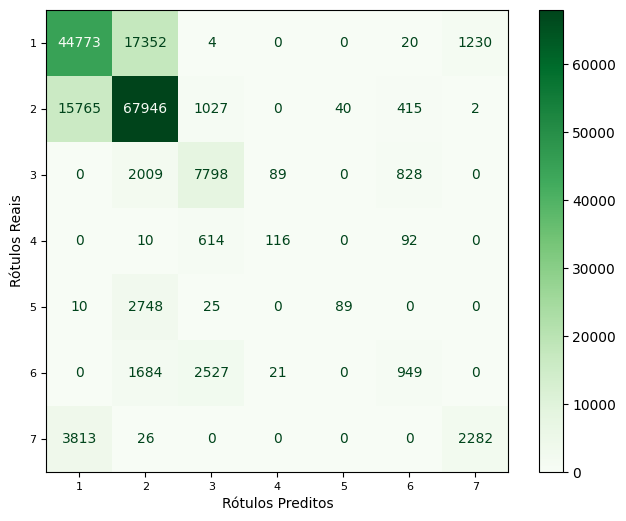

In [10]:
# 6 - Matriz de Confusão

fig, ax = plt.subplots(figsize = (8, 6))

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax = ax, cmap = 'Greens')

ax.set_xlabel("Rótulos Preditos", fontsize = 10)
ax.set_ylabel("Rótulos Reais", fontsize = 10)

ax.tick_params(axis = 'both', labelsize = 8)

plt.show()

In [11]:
# 6 - Acurácia, Precisão, Recall e F1-Score

metrics_data = {
    'Acurácia': [accuracy_score(y_test, y_pred)],
    'Precisão': [precision_score(y_test, y_pred, average = 'weighted', zero_division = 0)],
    'Recall': [recall_score(y_test, y_pred, average = 'weighted', zero_division = 0)],
    'F1-Score': [f1_score(y_test, y_pred, average = 'weighted', zero_division = 0)]
}

# Criar DataFrame e exibir em porcentagem
df_metricas = pd.DataFrame(metrics_data, index = ['MLP 1']).T * 100

# Formatar os valores para 2 casas decimais e adicionar '%'
df_metricas = df_metricas.applymap(lambda x: f"{x:.2f}%")

print(df_metricas)

           MLP 1
Acurácia  71.11%
Precisão  70.37%
Recall    71.11%
F1-Score  69.86%


In [ ]:
# 7 - Repetindo o treinamento da rede neural MLP anterior 100 vezes, com verbose = False :

def treino_holdout_adam(X, y):
    X_train, X_test, y_train, y_test, X_train_std, y_test_std = holdout_partition(X, y)
    
    mlp = MLPClassifier(
    hidden_layer_sizes = (10,),     # 1 camada com 10 neurônios
    activation = 'relu',            # função de ativação ReLU
    solver = 'adam',                # solver Adam
    max_iter = 300,                 # 300 épocas
    verbose = False,                # sem passo a passo do treinamento
    )

    mlp.fit(X_train_std, y_train)
    y_pred = mlp.predict(X_train_std)
    
    acc = accuracy_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred, average = 'weighted', zero_division = 0)
    return acc, f1

# Executar em paralelo (usa todos os núcleos disponíveis)
resultados_adam = Parallel(n_jobs = -1)(delayed(treino_holdout_adam)(X, y) for _ in range(100))

# Separar métricas
accs_adam, f1s_adam = zip(*resultados_adam)

In [13]:
print("Resultados - Adam (Treino)")
print(f"Acurácia - Média: {np.mean(accs_adam):.4f}, Desvio Padrão: {np.std(accs_adam):.4f}")
print(f"F1-Score - Média: {np.mean(f1s_adam):.4f}, Desvio Padrão: {np.std(f1s_adam):.4f}")

Resultados - Adam (Treino)
Acurácia - Média: 0.7185, Desvio Padrão: 0.0031
F1-Score - Média: 0.7090, Desvio Padrão: 0.0037


In [14]:
# 8 - Repetindo o treinamento com solver = "sgd":

def treino_holdout_sgd(X, y):
    X_train, X_test, y_train, y_test, X_train_std, y_test_std = holdout_partition(X, y)
    
    mlp = MLPClassifier(
        hidden_layer_sizes = (10,),     # 1 camada com 10 neurônios
        activation = 'relu',            # função de ativação ReLU
        solver = 'sgd',                # solver Adam
        max_iter = 300,                 # 300 épocas
        verbose = False,                # sem passo a passo do treinamento
    )
    
    mlp.fit(X_train_std, y_train)
    y_pred = mlp.predict(X_train_std)

    acc = accuracy_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred, average = 'weighted', zero_division = 0)

    return acc, f1

resultados_sgd = Parallel(n_jobs = -1)(delayed(treino_holdout_sgd)(X, y) for _ in range(100))

accs_sgd, f1s_sgd = zip(*resultados_sgd)

In [15]:
print("Resultados - SGD (Treino)")
print(f"Acurácia - Média: {np.mean(accs_sgd):.4f}, Desvio Padrão: {np.std(accs_sgd):.4f}")
print(f"F1-Score - Média: {np.mean(f1s_sgd):.4f}, Desvio Padrão: {np.std(f1s_sgd):.4f}")

Resultados - SGD (Treino)
Acurácia - Média: 0.7147, Desvio Padrão: 0.0028
F1-Score - Média: 0.7037, Desvio Padrão: 0.0035


In [26]:
if np.mean(accs_adam) > np.mean(accs_sgd):
    print("\nAdam obteve melhor desempenho médio que SGD.")
else:
    print("\nSGD obteve melhor desempenho médio que Adam.")

# Diferença clara?
print(f"Diferença média de acurácia: {np.mean(accs_adam) - np.mean(accs_sgd):.4f}")
print(f"Diferença média de F1-score: {np.mean(f1s_adam) - np.mean(f1s_sgd):.4f}")


Adam obteve melhor desempenho médio que SGD.
Diferença média de acurácia: 0.0037
Diferença média de F1-score: 0.0053


In [27]:
print("Maior valor:", np.max(X))

Maior valor: Elevation                             3858
Aspect                                 360
Slope                                   66
Horizontal_Distance_To_Hydrology      1397
Vertical_Distance_To_Hydrology         601
Horizontal_Distance_To_Roadways       7117
Hillshade_9am                          254
Hillshade_Noon                         254
Hillshade_3pm                          254
Horizontal_Distance_To_Fire_Points    7173
dtype: int64


C:\Users\danil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


## Discussão

Nos passos anteriores, você avaliou o desempenho de uma única rede neural que contém os seguintes parâmetros: uma única camada oculta com 10 neurônios e função de ativação ReLU. O otimizador utilizado, quer seja SGD ou ADAM, trata-se do algoritmo para aproximar o gradiente do erro. Neste sentido, a escolha do otimizador é um hiperparâmetro, pois diz respeito a como a rede neural definida previamente atuará "em tempo de execução"  durante o processo de treinamento. Também são hiperparâmetros a quantidade de épocas, a taxa de aprendizado inicial, dentre outros.

Cabe alientar também que você efetuou o treinamento desta rede por 100 vezes e apresentou os resultados em termos de média +- desvio padrão. Lembre-se que em uma rede neural há a inicialização aleatória de pesos e, em consequência, o desempenho delas está sujeito à uma flutuação estocástica. A execução destas múltiplas vezes faz com que eliminemos algum viés introduzido por uma boa ou má "sorte" na escolha de pesos no caso de uma única execução.

Você também aprendeu uma estratégia para escalonar os atributos para uma melhor convergência da rede. Utilize-a em todos os treinamentos e testes propostos a seguir.

## Propondo Novas Arquiteturas

Variando  os parâmetros (uma ou duas camadas ocultas, com diferente números de neurônios em cada uma delas e a função de ativação) e o hiperparâmetros solver (Adam ou SGD) e o número de épocas (100,150 e 200), atenda ao que se pede:

1. Proponha 10 arquiteturas distintas de RNAs para o problema em questão, à sua escolha
2. Avalie cada uma das arquiteturas perante todos os hiperparâmetros apresentados por 100 vezes
3. Como resultado da avaliação, apresente:  
    3.1 Top-3 melhores redes no tocante à F-Score e Acurácia  
    3.2 Repetição em que houve o melhor desempenho de cada uma dessas redes: ilustre tp, tf, fp e fn  

In [38]:
# Lista de arquiteturas
arquiteturas = [
    ((10, 10), 'relu', 'adam', 100), 
    ((23, 27), 'tanh', 'sgd', 100), 
    ((30, 10), 'identity', 'adam', 150),
    ((40,), 'relu', 'adam', 200), 
    ((33,), 'tanh', 'adam', 100), 
    ((20, 10), 'logistic', 'adam', 150),
    ((18, 18), 'identity', 'adam', 150), 
    ((35, 10), 'relu', 'sgd', 200), 
    ((10, 10), 'identity', 'adam', 200),
    ((50,), 'identity', 'sgd', 150)
]

media_geral_arquiteturas = []  # Lista da media de acuracia, f1-score e indice de cada uma das arquiteturas

In [39]:
# Função auxiliar para gerar Top-3 com base em acurácia e F1-score
def gerar_top3(media_geral_arquiteturas):
    top3 = sorted(media_geral_arquiteturas, key=lambda r: (r[1], r[0]), reverse = True)

    print("\nTop 3 Arquiteturas (por Acurácia e F1-Score):")
    for i, (f1, acc, idx, std_f1, std_acc) in enumerate(top3[:3]):
        print(f"Top {i}: Arquitetura {arquiteturas[idx]}, Acurácia = {acc:.4f} ± {std_acc:.4f}, F1 = {f1:.4f} ± {std_f1:.4f}")
    return top3[:3]

In [40]:
# Função que gera os modelos de MLPClassifier com base na arquitetura passada como parâmetro, retornando os valores de acurácia de f1-score

def treino_e_avaliacao(X, y, arquitetura):
    X_train, X_test, y_train, y_test, X_train_std, X_test_std = holdout_partition(X, y)
    
    mlp = MLPClassifier(
        hidden_layer_sizes = arquitetura[0],
        activation = arquitetura[1],
        solver = arquitetura[2],
        max_iter = arquitetura[3],
        verbose = False
    )

    mlp.fit(X_train_std, y_train)
    y_pred = mlp.predict(X_test_std)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average = 'weighted', zero_division = 0)
    cm = confusion_matrix(y_test, y_pred)

    return acc, f1, cm, y_test, y_pred

In [34]:
arquiteturas[0]

((10, 10), 'relu', 'adam', 10)

In [41]:
# Resultados detalhados para análise posterior

resultados_detalhados = []

for idx, arquitetura in enumerate(arquiteturas):
    print(f"Executando arquitetura {idx + 1}/10...")

    resultados = Parallel(n_jobs = -1)(delayed(treino_e_avaliacao)(X, y, arquitetura) for _ in range(100))

    acuracias = [r[0] for r in resultados]
    f1_scores = [r[1] for r in resultados]

    # Melhor execução com base em F1 (desempate por acurácia)
    melhor_resultado = max(resultados, key = lambda r: (r[1], r[0]))

    media_acc = np.mean(acuracias)
    media_f1 = np.mean(f1_scores)
    desvio_acc = np.std(acuracias)
    desvio_f1 = np.std(f1_scores)

    # Armazenar resultados
    media_geral_arquiteturas.append((media_f1, media_acc, idx, desvio_f1, desvio_acc))
    resultados_detalhados.append({
        'arquitetura': arquitetura,
        'acuracia': melhor_resultado[0],
        'f1_score': melhor_resultado[1],
        'cm': melhor_resultado[2],
        'y_test': melhor_resultado[3],
        'y_pred': melhor_resultado[4]
    })

Executando arquitetura 1/10...
Executando arquitetura 2/10...
Executando arquitetura 3/10...
Executando arquitetura 4/10...
Executando arquitetura 5/10...
Executando arquitetura 6/10...
Executando arquitetura 7/10...
Executando arquitetura 8/10...
Executando arquitetura 9/10...
Executando arquitetura 10/10...


In [ ]:
# V2

for j in range(5):  # Testar só as 5 primeiras
    print(f"\nARQUITETURA {j} \nCamadas: {arquiteturas[j][0]}\n")
    
    # Paraleliza 10 execuções da mesma arquitetura
    resultados = Parallel(n_jobs = -1)(
        delayed(treino_e_avaliacao)(X, y, arquiteturas[j], j) for _ in range(10)
    )

    # Separa os valores para cálculo de médias
    accs = [acc for acc, f1 in resultados]
    f1s  = [f1  for acc, f1 in resultados]

    resultados_arquitetura_i = (np.mean(f1s), np.mean(accs), j)
    media_geral_arquiteturas.append(resultados_arquitetura_i)

    #print(f"RESULTADOS: \nAcuracia média: {np.mean(accs):.4f} \nF1-score médio: {np.mean(f1s):.4f}\n")
    #print("Parciais:", media_geral_arquiteturas, "\n")

In [42]:
# Identificar top 3
top3 = gerar_top3(media_geral_arquiteturas)


Top 3 Arquiteturas (por Acurácia e F1-Score):
Top 0: Arquitetura ((35, 10), 'relu', 'sgd', 200), Acurácia = 0.7651 ± 0.0031, F1 = 0.7592 ± 0.0033
Top 1: Arquitetura ((23, 27), 'tanh', 'sgd', 100), Acurácia = 0.7616 ± 0.0031, F1 = 0.7543 ± 0.0033
Top 2: Arquitetura ((40,), 'relu', 'adam', 200), Acurácia = 0.7578 ± 0.0030, F1 = 0.7526 ± 0.0034



Top 1 - Arquitetura: ((35, 10), 'relu', 'sgd', 200)
Acurácia: 0.7726, F1-Score: 0.7679


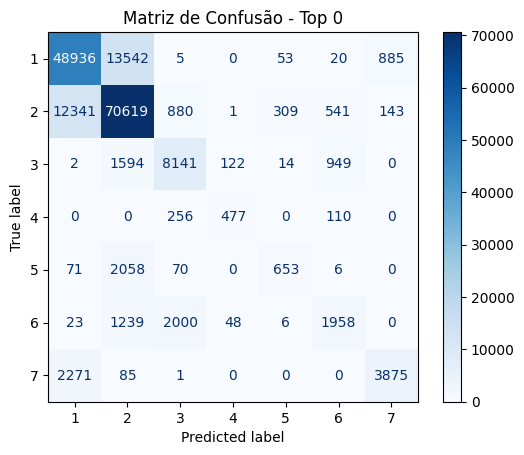


Top 2 - Arquitetura: ((23, 27), 'tanh', 'sgd', 100)
Acurácia: 0.7673, F1-Score: 0.7604


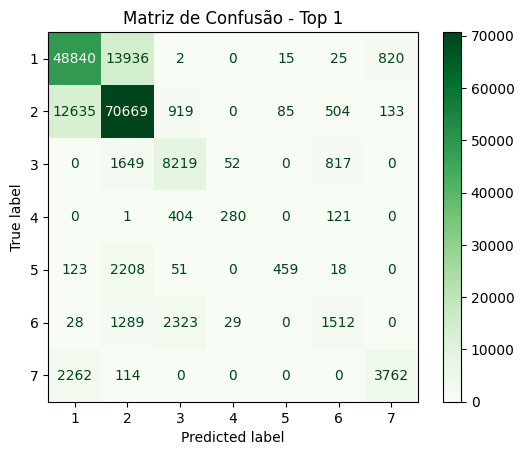


Top 3 - Arquitetura: ((40,), 'relu', 'adam', 200)
Acurácia: 0.7649, F1-Score: 0.7610


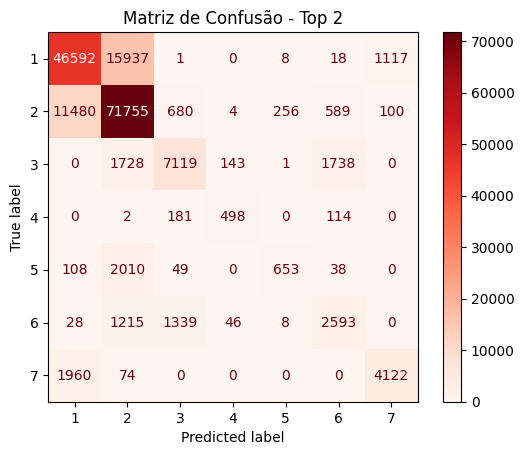

In [47]:
# Exibir matrizes de confusão para as 3 melhores
cmaps = ['Blues', 'Greens', 'Reds']

for i, (_, _, idx, _, _) in enumerate(top3):
    melhor = resultados_detalhados[idx]
    print(f"\nTop {i + 1} - Arquitetura: {melhor['arquitetura']}")
    print(f"Acurácia: {melhor['acuracia']:.4f}, F1-Score: {melhor['f1_score']:.4f}")
    disp = ConfusionMatrixDisplay.from_predictions(melhor['y_test'], melhor['y_pred'], cmap=cmaps[i])
    disp.ax_.set_title(f'Matriz de Confusão - Top {i}')
    plt.show()

## Estimando o número de neurônios

Um dos problemas de pesquisa com redes neurais artificiais consiste na determinação do número de neurônios em sua arquitetura. Embora não seja possível definir a priori qual rede neural é adequada para um problema, pois isto só é possível mediante uma busca exaustiva, há regras na literatura que sugerem o número de neurônios escondidos, tal como a regra da Pirâmide Geométrica, dada a seguir:

$$N_h = \alpha \cdot \sqrt{N_i \cdot N_o},$$

em que $N_h$ é o número de neurônios ocultos (a serem distribuídos em uma ou duas camadas ocultas), $N_i$ é o número de neurônios na camada de entrada e $N_o$ é o número de neurônios na camada de saída. 

1. Consulte a documentação da classe MLPClassifier (disponível em https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) e obtenha os valores de $N_i$ e $N_o$.
2. Teste os valores de $\alpha$ como sendo iguais a $0.5$, $2$ e $3$.
3. Proponha pelo menos 30 redes neurais segundo a regra da pirâmide geométrica e teste-as nos mesmos termos estabelecidos anterioremente  (solver, épocas, etc.)  
    3.1 Apresente as top-3 melhores redes no tocante à F-Score e Acurácia  

O valor de $N_i$ deve ser igual a quantidade de características de entrada do treinamento e o $N_0$ deve ser igual a quantidade de classes distintas, tedo em vista que este é um problema de classificação multiclasse. Assim:


In [63]:
n_i = df.shape[1]
n_i

11

In [64]:
n_0 = y.nunique()
n_0

7

In [65]:
alphas = [0.5, 2, 3]

In [75]:
def criar_novas_arqs_com_nh(alphas, arquiteturas):
    novas_arqs = []
    
    for alpha in alphas:
        n_h = int(alpha * np.sqrt(n_i * n_0))  # Cálculo do número de neurônios na camada escondida

        for arq in arquiteturas:
            hidden_layer = (n_h,)  # Garantimos que seja tupla
            activation = arq[1]
            solver = arq[2]
            max_iter = arq[3]

            nova_arquitetura = (hidden_layer, activation, solver, alpha, max_iter)
            novas_arqs.append(nova_arquitetura)
    
    return novas_arqs

In [73]:
def treino_e_avaliacao_completo(X, y, arquitetura):
    X_train, X_test, y_train, y_test, X_train_std, X_test_std = holdout_partition(X, y)

    mlp = MLPClassifier(
        hidden_layer_sizes=arquitetura[0],
        activation=arquitetura[1],
        solver=arquitetura[2],
        alpha=arquitetura[3],  # inclui alpha aqui
        max_iter=arquitetura[4],
        verbose=False
    )
    
    mlp.fit(X_train_std, y_train)
    y_pred = mlp.predict(X_test_std)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    cm = confusion_matrix(y_test, y_pred)

    return acc, f1, cm, y_test, y_pred

In [77]:
media_geral_nh = [] # Lista da media de acuracia, f1-score e indice de cada uma das arquiteturas
resultados_detalhados_nh = []  # salva os melhores modelos com y_test, y_pred e matriz

novas_arqs = criar_novas_arqs_com_nh(alphas, arquiteturas)

for j in range(len(novas_arqs)):  
    
    print(f"\nExecutando arquitetura {j + 1}/{len(novas_arqs)}...")

    # Paralelização das 100 iterações para cada uma das arquiteturas
    resultados = Parallel(n_jobs = -1)(
        delayed(treino_e_avaliacao_completo)(X, y, novas_arqs[j]) for _ in range(100)
    )

   # Encontrar o melhor resultado (maior F1, desempate por acurácia)
    melhor_resultado = max(resultados, key=lambda r: (r[1], r[0]))

    media_acc = np.mean(acuracias)
    media_f1 = np.mean(f1_scores)
    std_acc = np.std(acuracias)
    std_f1 = np.std(f1_scores)

    # Armazena a média geral da arquitetura
    media_geral_nh.append((media_f1, media_acc, j, std_f1, std_acc))

    # Armazena o melhor caso completo para exibição posterior
    resultados_detalhados_nh.append({
        'arquitetura': novas_arqs[j],
        'acuracia': melhor_resultado[0],
        'f1_score': melhor_resultado[1],
        'cm': melhor_resultado[2],
        'y_test': melhor_resultado[3],
        'y_pred': melhor_resultado[4]
    })


Executando arquitetura 1/30...

Executando arquitetura 2/30...

Executando arquitetura 3/30...

Executando arquitetura 4/30...

Executando arquitetura 5/30...

Executando arquitetura 6/30...

Executando arquitetura 7/30...

Executando arquitetura 8/30...

Executando arquitetura 9/30...

Executando arquitetura 10/30...

Executando arquitetura 11/30...

Executando arquitetura 12/30...

Executando arquitetura 13/30...

Executando arquitetura 14/30...

Executando arquitetura 15/30...

Executando arquitetura 16/30...

Executando arquitetura 17/30...

Executando arquitetura 18/30...

Executando arquitetura 19/30...

Executando arquitetura 20/30...

Executando arquitetura 21/30...

Executando arquitetura 22/30...

Executando arquitetura 23/30...

Executando arquitetura 24/30...

Executando arquitetura 25/30...

Executando arquitetura 26/30...

Executando arquitetura 27/30...

Executando arquitetura 28/30...

Executando arquitetura 29/30...

Executando arquitetura 30/30...


In [80]:
top3_nh = gerar_top3(media_geral_nh)


Top 3 Arquiteturas (por Acurácia e F1-Score):
Top 0: Arquitetura ((10, 10), 'relu', 'adam', 100), Acurácia = 0.6970 ± 0.0012, F1 = 0.6817 ± 0.0012
Top 1: Arquitetura ((23, 27), 'tanh', 'sgd', 100), Acurácia = 0.6970 ± 0.0012, F1 = 0.6817 ± 0.0012
Top 2: Arquitetura ((30, 10), 'identity', 'adam', 150), Acurácia = 0.6970 ± 0.0012, F1 = 0.6817 ± 0.0012



Top 0 - Arquitetura: ((4,), 'relu', 'adam', 0.5, 100)
Acurácia: 0.7018, F1-Score: 0.6865


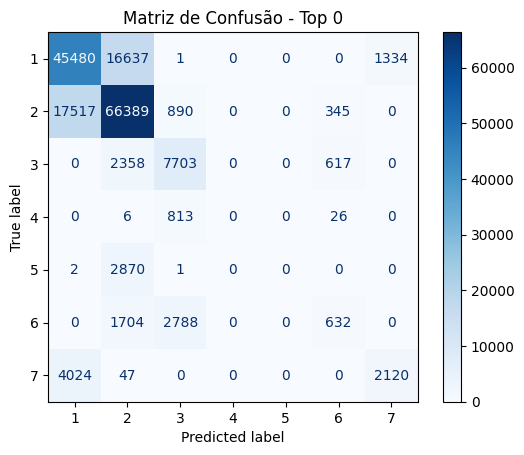


Top 1 - Arquitetura: ((4,), 'tanh', 'sgd', 0.5, 100)
Acurácia: 0.6983, F1-Score: 0.6747


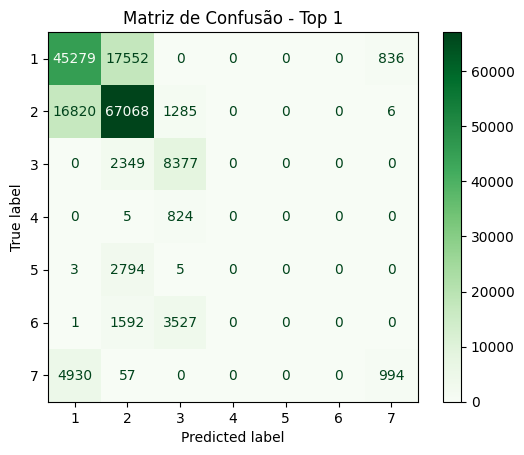


Top 2 - Arquitetura: ((4,), 'identity', 'adam', 0.5, 150)
Acurácia: 0.6932, F1-Score: 0.6765


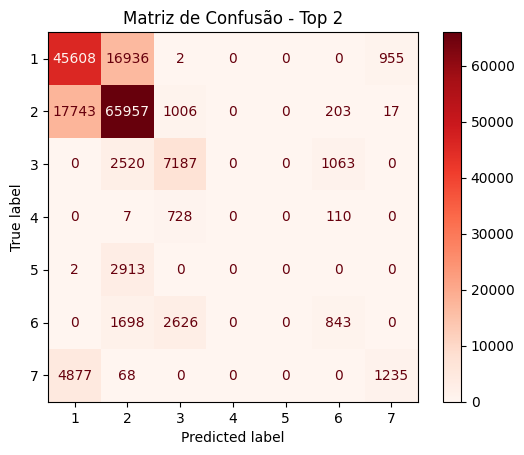

In [81]:
cmaps = ['Blues', 'Greens', 'Reds']

for i, (_, _, idx, _, _) in enumerate(top3_nh):
    melhor = resultados_detalhados_nh[idx]
    print(f"\nTop {i} - Arquitetura: {melhor['arquitetura']}")
    print(f"Acurácia: {melhor['acuracia']:.4f}, F1-Score: {melhor['f1_score']:.4f}")
    disp = ConfusionMatrixDisplay.from_predictions(melhor['y_test'], melhor['y_pred'], cmap = cmaps[i])
    disp.ax_.set_title(f'Matriz de Confusão - Top {i}')
    plt.show()

## Testando as Redes Neurais com Atributos Categóricos

1. Considere as 6 redes neurais obtidas nos dois top-3 anteriores (arquiteturas próprias e regra da pirâmide geométrica)
2. Com todos os atributos preditores da base de dados original, incluindo os categóricos, treine e teste estas mesmas redes por 100 repetições  
    2.1 Considere o melhor otimizador para cada uma delas  
    2.2 Faça uso de 200 épocas para treinamento  
    2.2 Apresente os resultados de acurácia e F-Score em termos da média +- dp para cada arquitetura
3. Apresente o gráfico boxplot para o F-Score das 6 arquiteturas perante as 100 repetições

In [82]:
top6 = [] 

# Armazena a configuração das arquiteturas com base nos indices obtidos do top3
top1, top2, top3 = arquiteturas[top3[0][2]], arquiteturas[top3[1][2]], arquiteturas[top3[2][2]] 
top1_n, top2_n, top3_n = novas_arqs[top3_nh[0][2]], novas_arqs[top3_nh[1][2]], novas_arqs[top3_nh[2][2]]

# Armazena os 2 top3 na lista top6
top6.append(top1)
top6.append(top2)
top6.append(top3)
top6.append(top1_n)
top6.append(top2_n)
top6.append(top3_n)

In [83]:
# Obter os dados sem os valores excluidos anteriormente
new_df = pd.read_csv('covtype.csv')
new_X, new_y = new_df.drop(columns = 'Cover_Type'), df['Cover_Type']

In [ ]:
# Nova funcao de teste com a variável max_iter predefinida para todos como 200

def treino_avaliacao_categoricos(X, y, arquitetura):
    X_train, X_test, y_train, y_test, X_train_std, X_test_std = holdout_partition(X, y)
    
    mlp = MLPClassifier(
        hidden_layer_sizes = arquitetura[0],
        activation = arquitetura[1],
        solver = arquitetura[2],
        max_iter = 200,
        verbose = False
    )

    mlp.fit(X_train_std, y_train)
    y_pred = mlp.predict(X_test_std)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division = 0)

    return acc, f1

In [ ]:
new_medias_gerais = []
for i in range (len(top6)):
    new_resultados = Parallel(n_jobs = -1)(
        delayed(treino_avaliacao_categoricos)(X, y, top6[i]) for _ in range (100)
    )

    new_acuracias_i, new_f1scores_i = zip(*new_resultados)

    new_resultados_arq = (np.mean(new_acuracias_i), np.mean(new_f1scores_i), i)
    new_medias_gerais.append(new_resultados_arq)
    print(f"\nARQUITETURA {i} Camadas: {top6[i][0]} Acuracia: {np.mean(new_acuracias_i):.4f} +- {np.std(new_acuracias_i):.4f} F1-Score: {np.mean(new_f1scores_i):.4f} +- {np.std(new_f1scores_i):.4f}\n")

## Considerações Parciais

1. É possível identificar uma rede com desempenho superior às demais?
2. Qual estratégia mostrou-se mais producente para a obtenção de boas arquiteturas (Estratégia Própria ou Pirâmide Geométrica)? Por quê?
3. Considerar os atributos categóricos trouxe melhorias? Justifique.
4. Um número maior de épocas trouxe melhorias?
5. Qual a maior dificuldade de resolução do problema proposto perante as RNAs?